## import lib

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

## create graph

In [3]:
G_symmetric = nx.Graph()
G_symmetric.add_edge('Steven',  'Laura')
G_symmetric.add_edge('Steven',  'Marc')
G_symmetric.add_edge('Steven',  'John')
G_symmetric.add_edge('Steven',  'Michelle')
G_symmetric.add_edge('Laura',   'Michelle')
G_symmetric.add_edge('Michelle','Marc')
G_symmetric.add_edge('George',  'John')
G_symmetric.add_edge('George',  'Steven')

In [26]:
print(nx.info(G_symmetric))

Name: 
Type: Graph
Number of nodes: 6
Number of edges: 8
Average degree:   2.6667


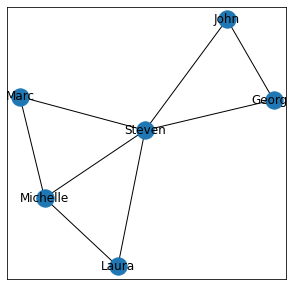

In [27]:
# undirect
plt.figure(figsize=(5,5))
nx.draw_networkx(G_symmetric);

In [28]:
G_asymmetric = nx.DiGraph()
G_asymmetric.add_edge('A','B')
G_asymmetric.add_edge('A','D')
G_asymmetric.add_edge('C','A')
G_asymmetric.add_edge('D','E')

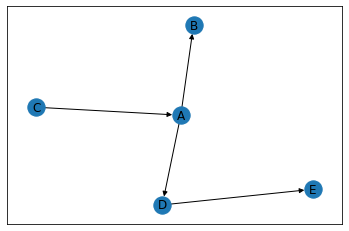

In [29]:
# direct
nx.spring_layout(G_asymmetric)
nx.draw_networkx(G_asymmetric)

# add weighted

In [30]:
G_weighted = nx.Graph()

G_weighted.add_edge('Steven',  'Laura',   weight=25)
G_weighted.add_edge('Steven',  'Marc',    weight=8)
G_weighted.add_edge('Steven',  'John',    weight=11)
G_weighted.add_edge('Steven',  'Michelle',weight=1)
G_weighted.add_edge('Laura',   'Michelle',weight=1)
G_weighted.add_edge('Michelle','Marc',    weight=1)
G_weighted.add_edge('George',  'John',    weight=8)
G_weighted.add_edge('George',  'Steven',  weight=4)

In [31]:
elarge = [(u, v) for (u, v, d) in G_weighted.edges(data=True) if d['weight'] > 8]
esmall = [(u, v) for (u, v, d) in G_weighted.edges(data=True) if d['weight'] <= 8]

In [32]:
pos = nx.circular_layout(G_weighted)  # positions for all nodes

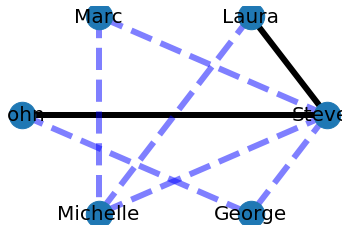

In [33]:
# nodes
nx.draw_networkx_nodes(G_weighted, pos, node_size=700)

# edges
nx.draw_networkx_edges(G_weighted, pos, edgelist=elarge,width=6)
nx.draw_networkx_edges(G_weighted, pos, edgelist=esmall,width=6, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G_weighted, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show();

## Network Distance Measures

In [34]:
#Degree
nx.degree(G_symmetric, 'Michelle')

3

In [35]:
nx.shortest_path(G_symmetric, 'Michelle', 'John')

['Michelle', 'Steven', 'John']

In [36]:
nx.shortest_path_length(G_symmetric, 'Michelle', 'John')

2

## Centrality measures

In [18]:
#Degree Centrality

In [37]:
nx.degree_centrality(G_symmetric)

{'Steven': 1.0,
 'Laura': 0.4,
 'Marc': 0.4,
 'John': 0.4,
 'Michelle': 0.6000000000000001,
 'George': 0.4}

In [38]:
# closeness centrality
nx.closeness_centrality(G_symmetric)

{'Steven': 1.0,
 'Laura': 0.625,
 'Marc': 0.625,
 'John': 0.625,
 'Michelle': 0.7142857142857143,
 'George': 0.625}

In [39]:
# betwenness centrality
nx.betweenness_centrality(G_symmetric)

{'Steven': 0.65,
 'Laura': 0.0,
 'Marc': 0.0,
 'John': 0.0,
 'Michelle': 0.05,
 'George': 0.0}

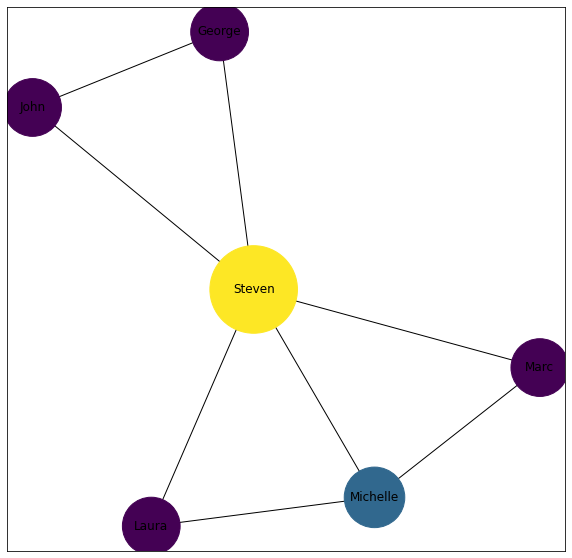

In [40]:
pos = nx.spring_layout(G_symmetric)
betCent = nx.betweenness_centrality(G_symmetric, normalized=True, endpoints=True)
node_color = [20000.0 * G_symmetric.degree(v) for v in G_symmetric]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(10,10))
nx.draw_networkx(G_symmetric, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size )